# <span style="color:Blue">Assignment-4 of COSC442721SP: Data Science with Python</span>

# <span style="color:Blue">Due: Saturday, July 10, 2021, @11:59 PM</span>

### <span style="color:Red">The Boston House Price Dataset involves predicting a house price in thousands of dollars given details of the house and its neighborhood. The dataset is small in size with only 506 cases. The details of each variable are available at the beginning of the file. Perform the following tasks: (See Week# 9 resources for examples and references)</span>

# <span style="color:Green">P1: Load the dataset and perform data preprocessing tasks to save the dataset as csv format in the working directory.</span>

In [1]:
#Codes of P1 here
import csv

with open('boston') as file:
    # There are 1162 characters before the data that need to be removed
    dataset = file.read()[1162:]
    #print(dataset)
    
    # Create the CSV file with the headers
    with open('bostonDataset.csv', 'w', newline = '') as outputFile:
        writer = csv.writer(outputFile)
        writer.writerow(["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"])
    
        count = 0
        currString = ""
        for curr in dataset.split():
            currString += (" " + curr)
            count += 1
            if (count == 14):
                writer.writerow(currString.split())
                currString = ""
                count = 0        

# <span style="color:Green">P2: Load the csv file from the working directory.</span>

In [2]:
#Codes of P2 here
import pandas as pd
csvData = pd.read_csv('bostonDataset.csv')

# <span style="color:Green">P3: Display the first 5 and last 5 records.</span>

In [3]:
#Codes of P3 here
print("First 10 rows:\n", csvData.head(5))
print("\nLast 10 rows:\n", csvData.tail(5))

First 10 rows:
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

Last 10 rows:
         CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959  0.0  11.93     

# <span style="color:Green">P4: Apply `describe()` to compute aggregates for each column and display the result.</span>

In [4]:
#Codes of P4 here
print(csvData.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

# <span style="color:Green">P5: Use `pairplot()` function to plot multiple pairwise bivariate distributions for 'RM', 'PTRATIO', 'LSTAT', 'MEDV'.</span>

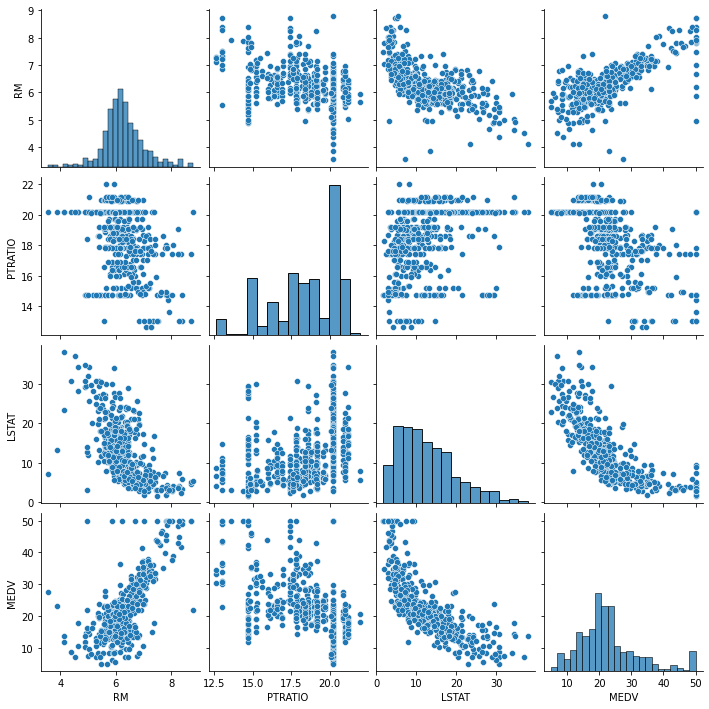

In [5]:
#Codes of P5 here
import seaborn as sns
sns.pairplot(csvData, 
             x_vars=["RM","PTRATIO","LSTAT","MEDV"], 
             y_vars=["RM","PTRATIO","LSTAT","MEDV"])

# <span style="color:Green">P6: Calculate and show correlation matrix using `heatmap()` for 'RM', 'PTRATIO', 'LSTAT', 'MEDV'.</span>

<AxesSubplot:>

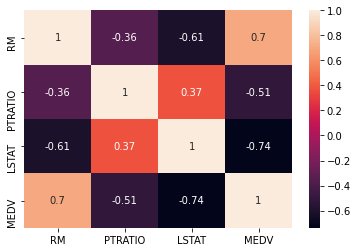

In [6]:
#Codes of P6 here
heatData = csvData[["RM","PTRATIO","LSTAT","MEDV"]]
sns.heatmap(heatData.corr(), annot=True)

# <span style="color:Green">P7: Predict the nitrous oxide level (NOX) (apply regression methods discussed in the class).</span>

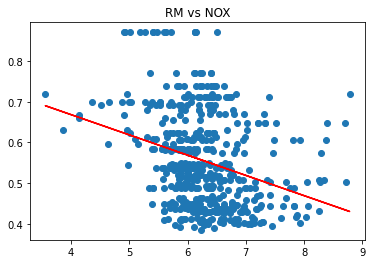

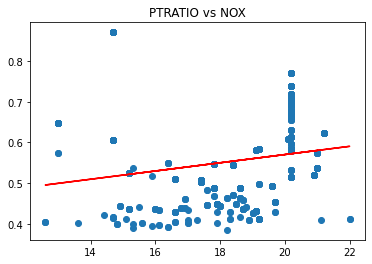

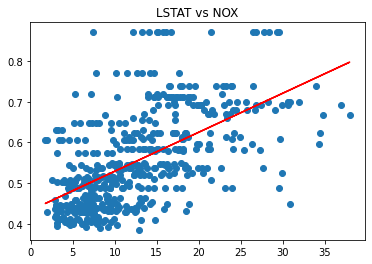

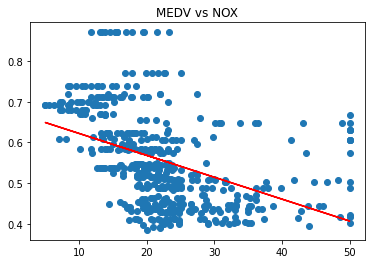

In [7]:
#Codes of P7 here
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

yNoxData = csvData["NOX"].values.reshape(-1, 1)

# RM
xRMData = csvData["RM"].values.reshape(-1, 1)
linearRegression = LinearRegression()
linearRegression.fit(xRMData, yNoxData)
nox_yRMPrediction = linearRegression.predict(xRMData)
plt.figure(0)
plt.title("RM vs NOX")
plt.scatter(xRMData, yNoxData)
plt.plot(xRMData, nox_yRMPrediction, color="red")

# PTRATIO
xPTRATIOData = csvData["PTRATIO"].values.reshape(-1, 1)
linearRegression = LinearRegression()
linearRegression.fit(xPTRATIOData, yNoxData)
nox_yPTRATIOPrediction = linearRegression.predict(xPTRATIOData)
plt.figure(1)
plt.title("PTRATIO vs NOX")
plt.scatter(xPTRATIOData, yNoxData)
plt.plot(xPTRATIOData, nox_yPTRATIOPrediction, color="red")

# LSTAT
xLSTATData = csvData["LSTAT"].values.reshape(-1, 1)
linearRegression = LinearRegression()
linearRegression.fit(xLSTATData, yNoxData)
nox_yLSTATPrediction = linearRegression.predict(xLSTATData)
plt.figure(2)
plt.title("LSTAT vs NOX")
plt.scatter(xLSTATData, yNoxData)
plt.plot(xLSTATData, nox_yLSTATPrediction, color="red")

# MEDV
xMEDVData = csvData["MEDV"].values.reshape(-1, 1)
linearRegression = LinearRegression()
linearRegression.fit(xMEDVData, yNoxData)
nox_yMEDVPrediction = linearRegression.predict(xMEDVData)
plt.figure(3)
plt.title("MEDV vs NOX")
plt.scatter(xMEDVData, yNoxData)
plt.plot(xMEDVData, nox_yMEDVPrediction, color="red")

# <span style="color:Green">P8: Predict the price of a home (apply regression methods discussed in the class).</span>

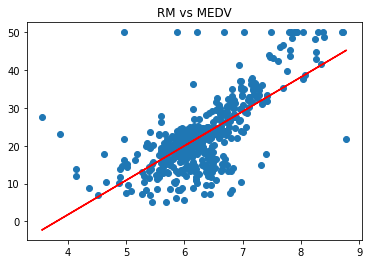

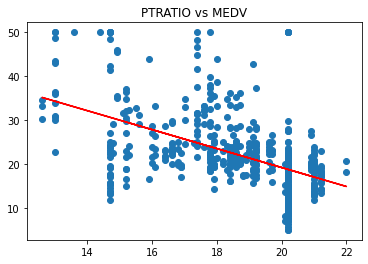

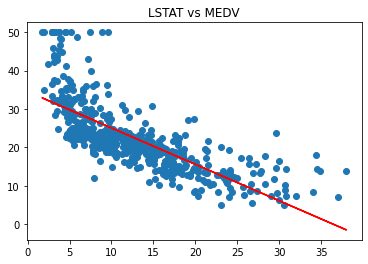

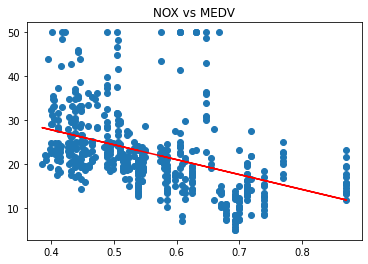

In [8]:
#Codes of P8 here
yMedvData = csvData["MEDV"].values.reshape(-1, 1)

# RM
xRMData = csvData["RM"].values.reshape(-1, 1)
linearRegression = LinearRegression()
linearRegression.fit(xRMData, yMedvData)
medv_yRMPrediction = linearRegression.predict(xRMData)
plt.figure(0)
plt.title("RM vs MEDV")
plt.scatter(xRMData, yMedvData)
plt.plot(xRMData, medv_yRMPrediction, color="red")

# PTRATIO
xPTRATIOData = csvData["PTRATIO"].values.reshape(-1, 1)
linearRegression = LinearRegression()
linearRegression.fit(xPTRATIOData, yMedvData)
medv_yPTRATIOPrediction = linearRegression.predict(xPTRATIOData)
plt.figure(1)
plt.title("PTRATIO vs MEDV")
plt.scatter(xPTRATIOData, yMedvData)
plt.plot(xPTRATIOData, medv_yPTRATIOPrediction, color="red")

# LSTAT
xLSTATData = csvData["LSTAT"].values.reshape(-1, 1)
linearRegression = LinearRegression()
linearRegression.fit(xLSTATData, yMedvData)
medv_yLSTATPrediction = linearRegression.predict(xLSTATData)
plt.figure(2)
plt.title("LSTAT vs MEDV")
plt.scatter(xLSTATData, yMedvData)
plt.plot(xLSTATData, medv_yLSTATPrediction, color="red")

# NOX
xNOXData = csvData["NOX"].values.reshape(-1, 1)
linearRegression = LinearRegression()
linearRegression.fit(xNOXData, yMedvData)
medv_yNOXPrediction = linearRegression.predict(xNOXData)
plt.figure(3)
plt.title("NOX vs MEDV")
plt.scatter(xNOXData, yMedvData)
plt.plot(xNOXData, medv_yNOXPrediction, color="red")

# <span style="color:Green">P9: Calculate the coefficient of determination, $R^2$, to quantify the model’s performance.</span>

In [9]:
#Codes of P9 here
from sklearn.metrics import r2_score

nox_rmPred = r2_score(yNoxData, nox_yRMPrediction)
nox_ptPred = r2_score(yNoxData, nox_yPTRATIOPrediction)
nox_lstatPred = r2_score(yNoxData, nox_yLSTATPrediction)
nox_medvPred = r2_score(yNoxData, nox_yMEDVPrediction)

print("Coefficient for RM vs NOX determination: ", nox_rmPred)
print("Coefficient for PTRATIO vs NOX determination: ", nox_ptPred)
print("Coefficient for LSTAT vs NOX determination: ", nox_lstatPred)
print("Coefficient for MEDV vs NOX determination: ", nox_medvPred)

medv_rmPred = r2_score(yMedvData, medv_yRMPrediction)
medv_ptPred = r2_score(yMedvData, medv_yPTRATIOPrediction)
medv_lstatPred = r2_score(yMedvData, medv_yLSTATPrediction)
medv_noxPred = r2_score(yMedvData, medv_yNOXPrediction)

print("\nCoefficient for RM vs MEDV determination: ", medv_rmPred)
print("Coefficient for PTRATIO vs MEDV determination: ", medv_ptPred)
print("Coefficient for LSTAT vs MEDV determination: ", medv_lstatPred)
print("Coefficient for NOX vs MEDV determination: ", medv_noxPred)

Coefficient for RM vs NOX determination:  0.09131770087582147
Coefficient for PTRATIO vs NOX determination:  0.03569555648099709
Coefficient for LSTAT vs NOX determination:  0.3491378991413132
Coefficient for MEDV vs NOX determination:  0.1826030425016988

Coefficient for RM vs MEDV determination:  0.48352545599133423
Coefficient for PTRATIO vs MEDV determination:  0.257847318009223
Coefficient for LSTAT vs MEDV determination:  0.5441462975864797
Coefficient for NOX vs MEDV determination:  0.1826030425016988


# <span style="color:Green">P10: How do you evaluate your model’s performance.</span>

In [10]:
# Discussion of P10 here

# Two sets of linear regressions were performed for NOX and MEDV. 
# -NOX compared:
# --RM vs NOX, PTRATIO vs NOX, LSTAT vs NOX, and MEDV vs NOX
# -MEDV compared:
# --RM vs MEDV, PTRATIO vs MEDV, LSTAT vs MEDV, and NOX vs MEDV

# To evaluate the model's performance, I calculated the r^2 coefficient by using the sklearn.metrics.r2_score method.
# This method allows you to pass in the true values and the predicted values of a set of scores. It then returns a float
# which represents the accuracy of the predicted values.
# The higher the returned value is (1 being the max), the more accurate the prediction is relative to the observed values.

# Looking at the coefficients for the NOX question, LSTAT has the highest coefficient.
# Looking at the coefficients for the MEDV question, LSTAT has the highest coefficient. RM also has a high value relative 
# to MEDV.

**Reference:** http://lib.stat.cmu.edu/datasets/boston

### <span style="color:Red">Please note that the submitted work will be considered as your own work and you confirm that you have not received any unauthorized assistance in preparing for or doing this assignment/examination. You confirm knowing that a mark of 0 may be assigned for your entire work.</span>

### <span style="color:Red">Submit your completed Jupyter notebook (.ipynb) to Moodle. You can submit multiple times but the grade will be posted based on your latest attempt.</span>